In [1]:
import os
import sys

def set_root_path():
    if os.getcwd().endswith('figures'): 
        os.chdir('../')
set_root_path()
sys.path.append('python/')
sys.path = [p for p in sys.path if "unbiased-inverse-volume-rendering" not in p]
print(os.getcwd())
print(sys.executable)
os.environ.pop("PYTHONPATH")

c:\Users\mayuf\source\repos\practical-inverse-rendering-of-textured-and-translucent-appearance
c:\Users\mayuf\anaconda3\envs\practical-inverse-rendering\python.exe


'C:\\Users\\mayuf\\source\\repos\\unbiased-inverse-volume-rendering\\mitsuba3\\build\\Release\\python'

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import mitsuba as mi
import drjit as dr
import numpy as np

from practical_reconstruction import figutils
from practical_reconstruction import scene_configuration
from practical_reconstruction import io_utils
from practical_reconstruction import optimization_cli
from core import integrators
from core import bsdfs
from core import textures

mi.set_variant("cuda_ad_rgb")

from core import integrators
from core import bsdfs
from core import textures
from core import emitters

integrators.register()
bsdfs.register()
textures.register()
emitters.register()

In [3]:
def load_modified_scene(scene_config, res=[400, 240]):
  os.makedirs(scene_config.result_folder,exist_ok=True)

  tmp_mitsuba_xml = io_utils.mitsuba_remote_to_local(scene_config,override=True)
  scene = mi.load_file(tmp_mitsuba_xml)
  params = mi.traverse(scene)

  params.update()
  return scene

In [ ]:
def _update_light_position(params, camera_idx):
	# Update light position for the selected sensor
	light_positions = [
      [-2.944557817004439, 48.8898011620204, -41.4402460343309],
      [-2.944557817004439, 48.8898011620204, -41.4402460343309],
      [-2.944557817004439, 48.8898011620204, -41.4402460343309],
      [27.055610795691802, 48.81986339495665, -31.610352043829998],
      [41.3180656055926, 48.73481598693242, -3.4462441460169386],
      [4.4671667393215575, 47.1369277980911, 42.78219333472567],
      [-42.91042711255302, 47.2987396659678, 3.9648433877314604],
      [-33.3138670015183, 47.353262970810604, -27.76333185326814],
      [-4.0928649644330495, 47.3407616054259, -43.412834290840195],
      [27.63531231151012, 47.2685587001079, -33.816397641445796],
      [43.2847288874415, 47.178949737549196, -4.59548434384601],
      [33.6881687764068, 47.1244264327064, 27.132690897152997],
      [33.6881687764068, 47.1244264327064, 27.132690897152997],
      [43.2847288874415, 47.178949737549196, -4.59548434384601],
      [27.63531231151012, 47.2685587001079, -33.816397641445796],
      [-4.0928649644330495, 47.3407616054259, -43.412834290840195],
      [-33.3138670015183, 47.353262970810604, -27.76333185326814],
      [-42.91042711255302, 47.2987396659678, 3.9648433877314604],
      [4.4671667393215575, 47.1369277980911, 42.78219333472567],
      [43.2160052121517, 47.0472861267224, -4.74011971286851],
      [4.61129874588445, 47.0047545442678, 42.71339045984761],
      [-27.110711342651502, 47.076678220198616, 33.2390870886382],
      [-42.842128441427, 47.1662190544112, 4.1088962216802996],
      [-33.3677017693281, 47.2209252406101, -27.613111405679],
      [-4.237421975160156, 47.20875063686579, -43.34461395103581],
      [27.4845881133758, 47.136826960935004, -33.870310579826004],
      [27.4845881133758, 47.136826960935004, -33.870310579826004],
      [-4.237421975160156, 47.20875063686579, -43.34461395103581],
      [-33.3677017693281, 47.2209252406101, -27.613111405679],
      [-42.842128441427, 47.1662190544112, 4.1088962216802996],
      [-27.110711342651502, 47.076678220198616, 33.2390870886382],
      [4.61129874588445, 47.0047545442678, 42.71339045984761],
      [43.2160052121517, 47.0472861267224, -4.74011971286851],
      [54.346621438817294, -0.786676450502069, 24.2689468400264],
      [-24.57995504968848, -0.724855391664175, 53.815623248847],
      [-55.69939927018449, -0.601267884668769, 20.471749327836],
      [-54.1263850774641, -0.503287498684284, -25.11075868475832],
      [-20.78236285181735, -0.48830981497388004, -56.230285802138],
      [24.80019141104173, -0.565108557522178, -54.657435093579295],
      [55.9196356315378, -0.688696064517584, -21.31356117256785],
      [55.9196356315378, -0.688696064517584, -21.31356117256785],
      [24.80019141104173, -0.565108557522178, -54.657435093579295],
      [-20.78236285181735, -0.48830981497388004, -56.230285802138],
      [-54.1263850774641, -0.503287498684284, -25.11075868475832],
      [-55.69939927018449, -0.601267884668769, 20.471749327836],
      [-24.57995504968848, -0.724855391664175, 53.815623248847],
      [54.346621438817294, -0.786676450502069, 24.2689468400264],
      [54.6571493603019, 4.41870496840774, 24.41354929025032],
      [39.6303138216189, 47.0780994649407, 17.415384223131202],
      [1.6598691824590588, 65.52149640366119, -0.2676721498317754],
      [-37.0116130568947, 48.94500399409722, -18.2771252295649],
	]
	params['emit-Point.position'] = light_positions[camera_idx]
	params.update()

def save_images(scene, params, dir, spp):
    print("start rendering")
    for i, sensor in enumerate(scene.sensors()):
					_update_light_position(params, i)
											
					integrator = mi.load_dict({
							'type': 'prb_path_volume',
							'max_sss_depth': 256,
							'max_path_depth': 10,
					})
					image = mi.render(scene, sensor=sensor, integrator=integrator, spp=spp)
					bitmap = mi.Bitmap(image).convert(
									pixel_format=mi.Bitmap.PixelFormat.RGB,
									component_format=mi.Struct.Type.UInt8,
									srgb_gamma=True
					)
					png_path = dir / f"ref_view_{i:03d}.png"
					bitmap.write(str(png_path))

					bitmap = mi.Bitmap(image).convert(
													pixel_format=mi.Bitmap.PixelFormat.RGB,
													component_format=mi.Struct.Type.Float32,
													srgb_gamma=False
					)
					exr_path = dir / f"ref_view_{i:03d}.exr"
					bitmap.write(str(exr_path))
					print(f"saving: {i}")

In [5]:
# Display reference image
scene_name = 'kiwi_refine'
technique = 'mipmap_pyramid'
result_folder = f'results/{scene_name}/{technique}'
scene_folder = f'third_party/{scene_name}'

override_bindings = []
override_bindings.append(f"SceneConfig.result_folder='{result_folder}'")
override_bindings.append(f"SceneConfig.scene_folder='{scene_folder}'")
override_bindings.append(f'SceneConfig.base_learning_rate={0.1}')
scene_config = scene_configuration.SceneConfig.get_instance(
				f'{scene_name}/{technique}', override_bindings, sss_config=True
)

scene = load_modified_scene(scene_config,res=[800,480])
ref_spp=4096
opt_spp=128
params = mi.traverse(scene)

ref_dir=Path("third_party/kiwi_refine/references")
ref_scene_path=f'third_party/{scene_name}/mts_scene/kiwi_refine_ref.xml'
ref_scene = mi.load_file(ref_scene_path)
ref_params = mi.traverse(ref_scene)

#save_images(ref_scene, ref_params, ref_dir, ref_spp)

# test_dir=Path("third_party/kiwi_refine/test")
# test_scene_path=f'third_party/{scene_name}/mts_scene/kiwi_test.xml'
# test_scene = mi.load_file(test_scene_path)
# test_params = mi.traverse(test_scene)
#print(test_scene)
#save_images(test_scene, test_params, test_dir, ref_spp)

Next result location: results/kiwi_refine/mipmap_pyramid
Preparing Mitsuba scene for optimization
Skipping already existing mitsuba scene: tmp\kiwi_refine\mts_scene
load
mipmap_flat texture num: 5
0: テクスチャ名 = roughness
1: テクスチャ名 = clearcoat_gloss
2: テクスチャ名 = single_scattering_albedo
3: テクスチャ名 = hg_coefficient
4: テクスチャ名 = normalmap
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------------
  Name                                                                      Flags    Type           Parent
  -----------------------------------------------------------------------------------------------------------------------------
  HDRFilm.size                                                                       ScalarVector2u HDRFilm
  HDRFilm.crop_size                                                                  ScalarVector2u HDRFilm
  HDRFilm.crop_offset                                                  

Loading references for sensor elm__100: 100%|██████████| 1/1 [00:00<00:00, 666.82it/s]


Preparing optimization variables
Optimizing mat-kiwi's extinction_coefficient from default value : [[4.87669, 5.03648, 10.948]]
Learning rate for (scalar) mat-kiwi (extinction_coefficient) is  0.1
Starting optimization


Rendering at resolution level 0 (width=436):   0%|          | 0/1024 [00:00<?, ?it/s]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[4.77203, 5.52294, 0.114984, -7.74885],
                  [0, 2.23568, -0.477269, 39.4088],
                  [-5.78599, 4.55508, 0.094833, -7.13834],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[9.54407, 0, -11.572]],
        t=[[11.0459, 4.47137, 9.11017]],
        n=[[0.229967, -0.954537, 0.189667]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

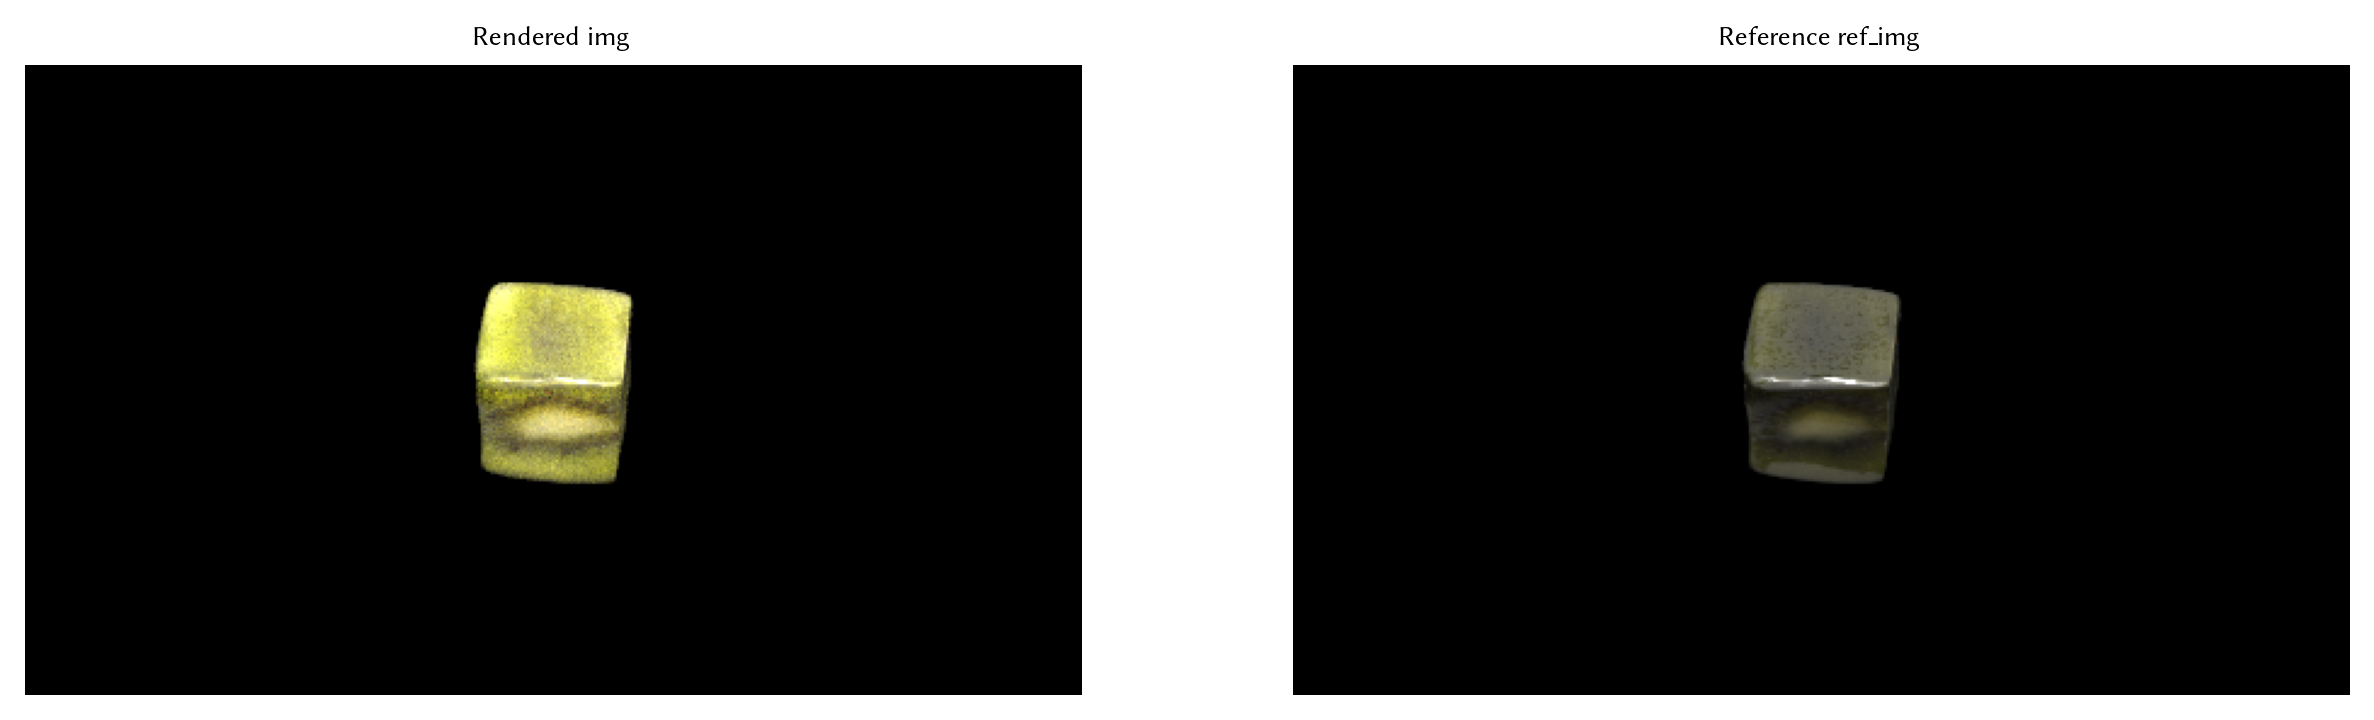

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[6.3119, -0.426124, -0.268563, 19.0994],
                  [0, 7.45839, -0.052596, 9.68172],
                  [4.05092, 0.663961, 0.418459, -29.7921],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[12.6238, 0, 8.10183]],
        t=[[-0.852248, 14.9168, 1.32792]],
        n=[[-0.537126, -0.105192, 0.836917]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100,

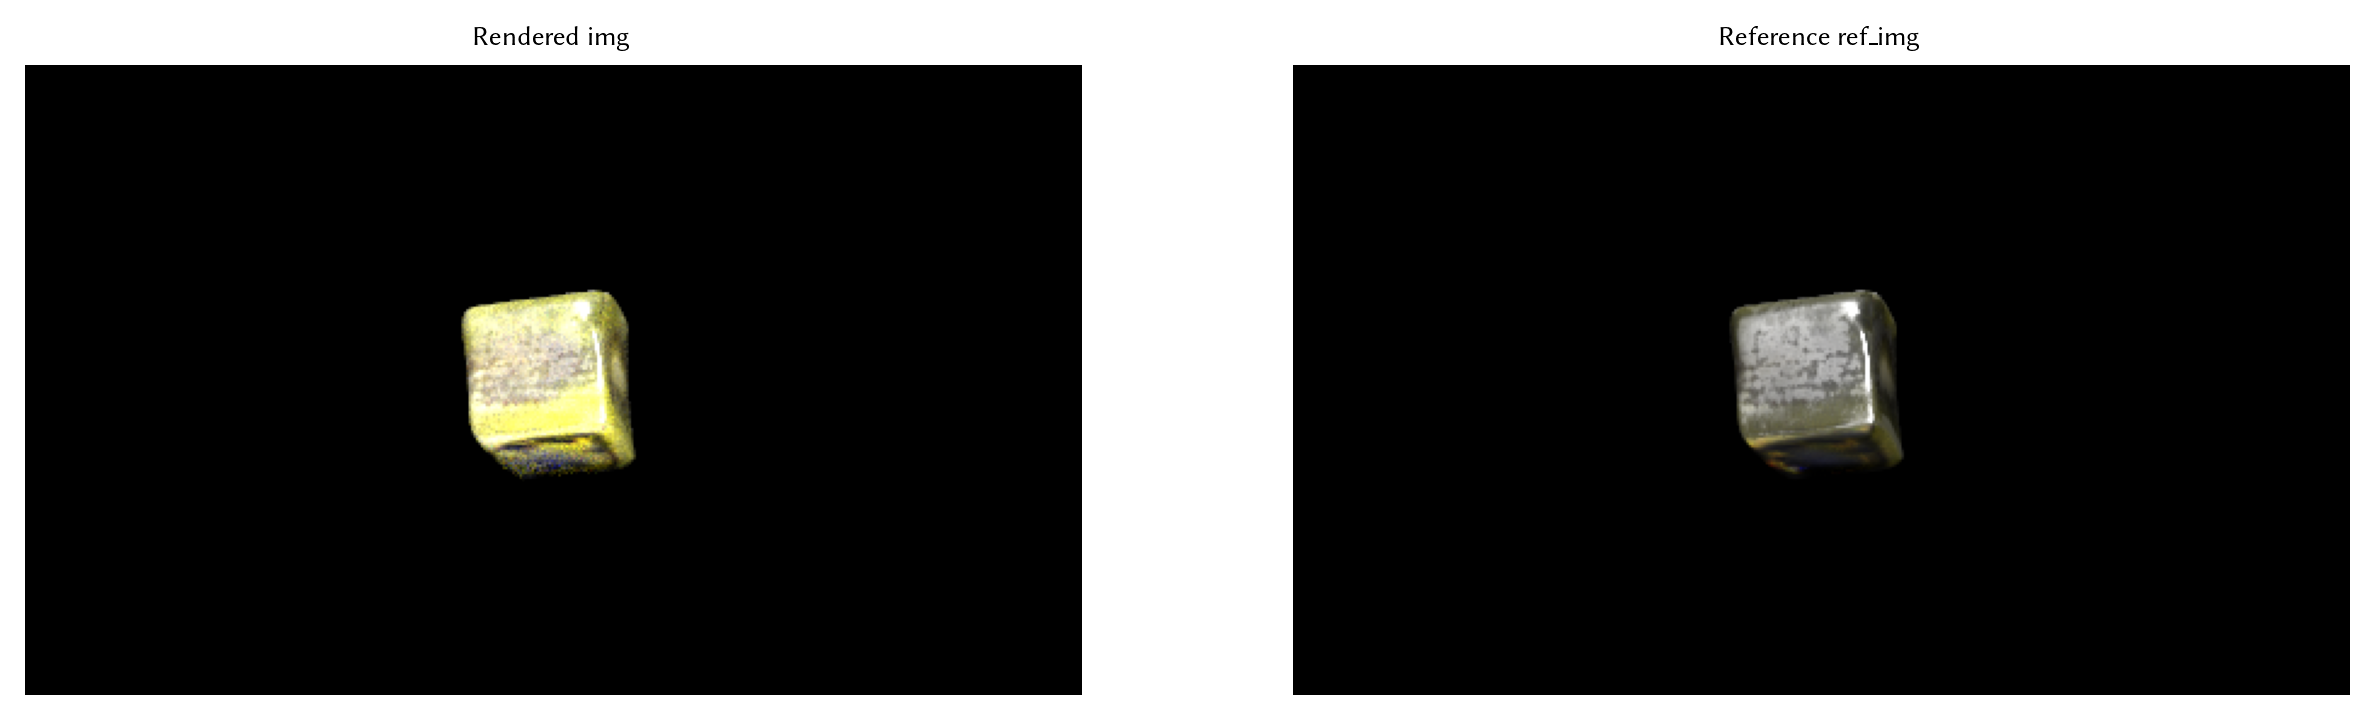

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.32883, 0.166872, 0.10563, -7.09407],
                  [-0, 7.45875, -0.05237, 9.6659],
                  [-1.59321, 0.76762, 0.485901, -34.5131],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.6577, 0, -3.18641]],
        t=[[0.333744, 14.9175, 1.53524]],
        n=[[0.211259, -0.10474, 0.971802]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

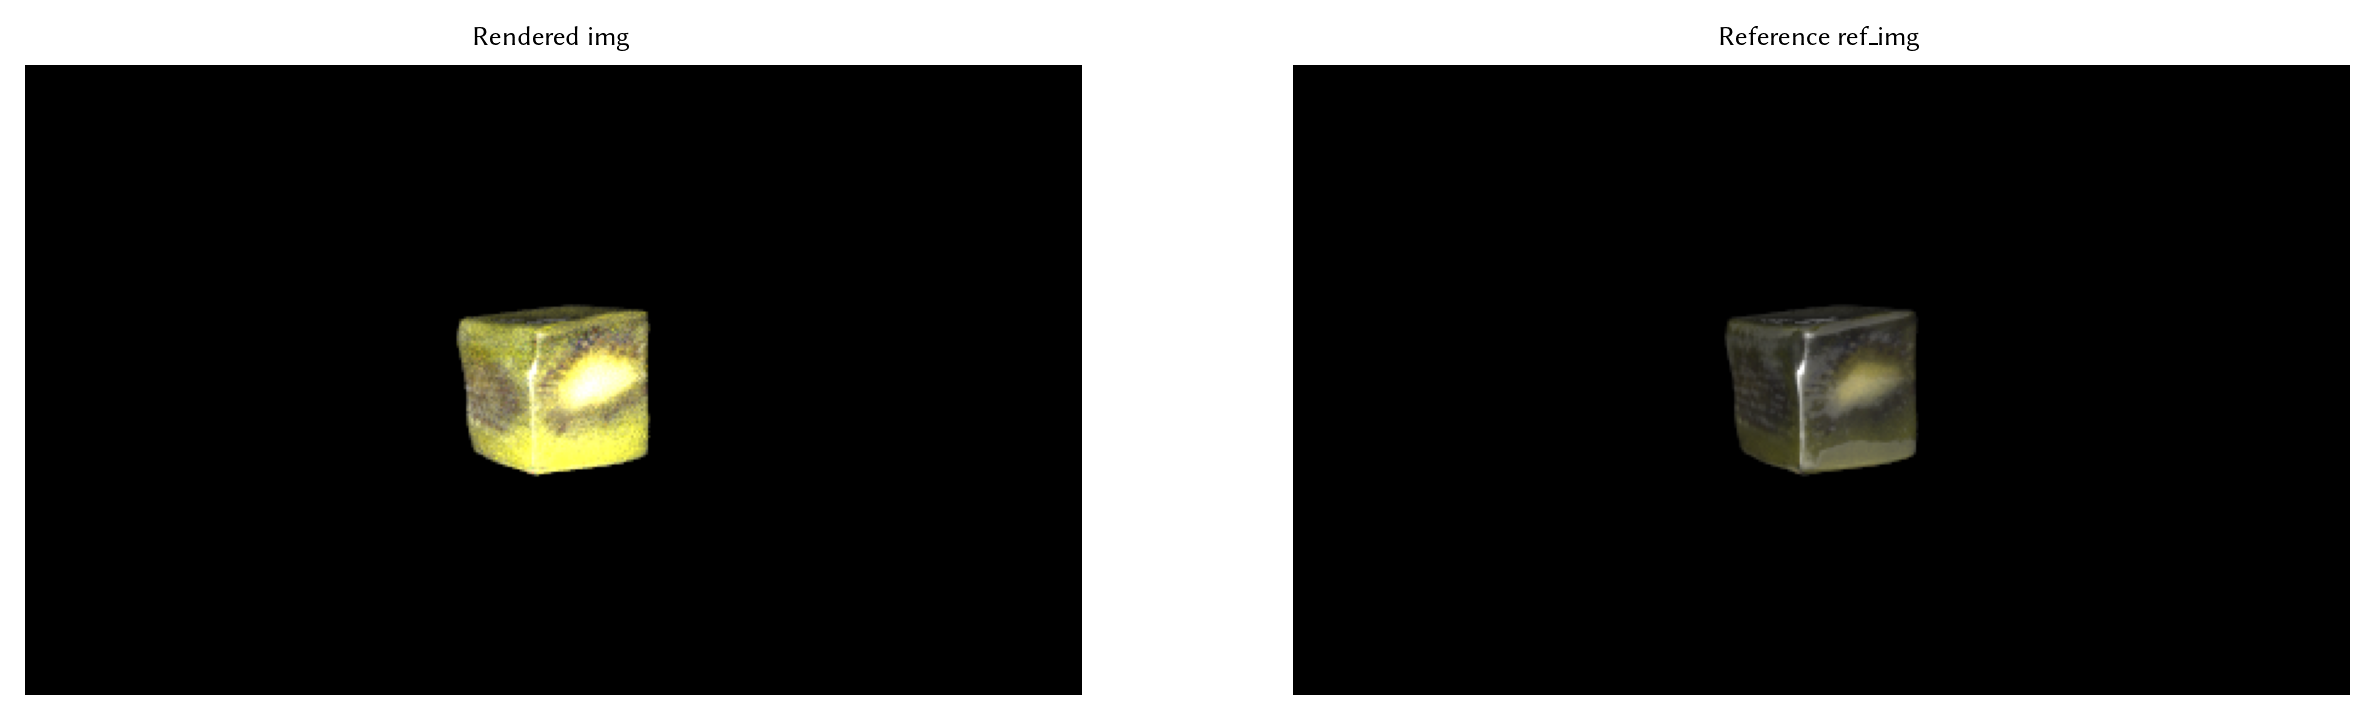

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.17276, -2.07285, 0.047364, -3.0155],
                  [-0, 2.43174, 0.472989, -27.1092],
                  [-2.19123, -6.78527, 0.155042, -11.353],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.3455, 0, -4.38245]],
        t=[[-4.1457, 4.86348, -13.5705]],
        n=[[0.0947287, 0.945978, 0.310085]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 

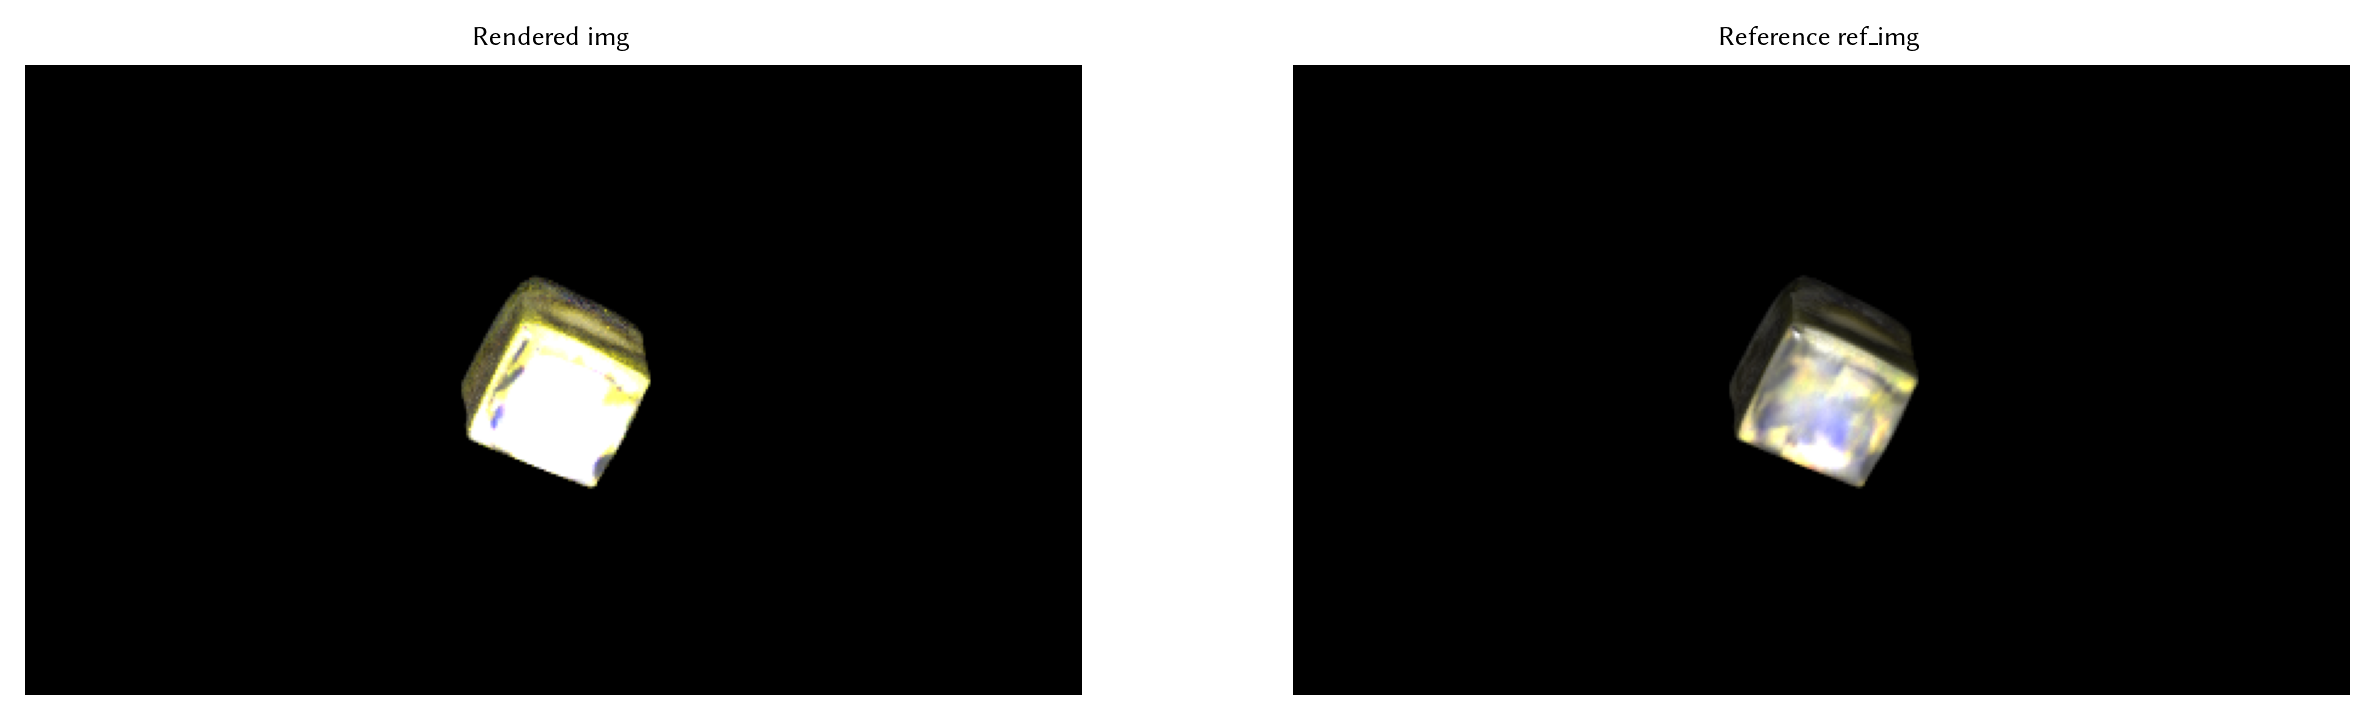

Rendering at resolution level 0 (width=436):   0%|          | 1/1024 [00:02<48:02,  2.82s/it]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.11702, -1.74065, -0.106836, 7.77849],
                  [-0, 5.07986, -0.367846, 31.7492],
                  [2.36601, 5.23594, 0.321365, -22.9955],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.234, 0, 4.73202]],
        t=[[-3.48131, 10.1597, 10.4719]],
        n=[[-0.213671, -0.735693, 0.642729]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 1

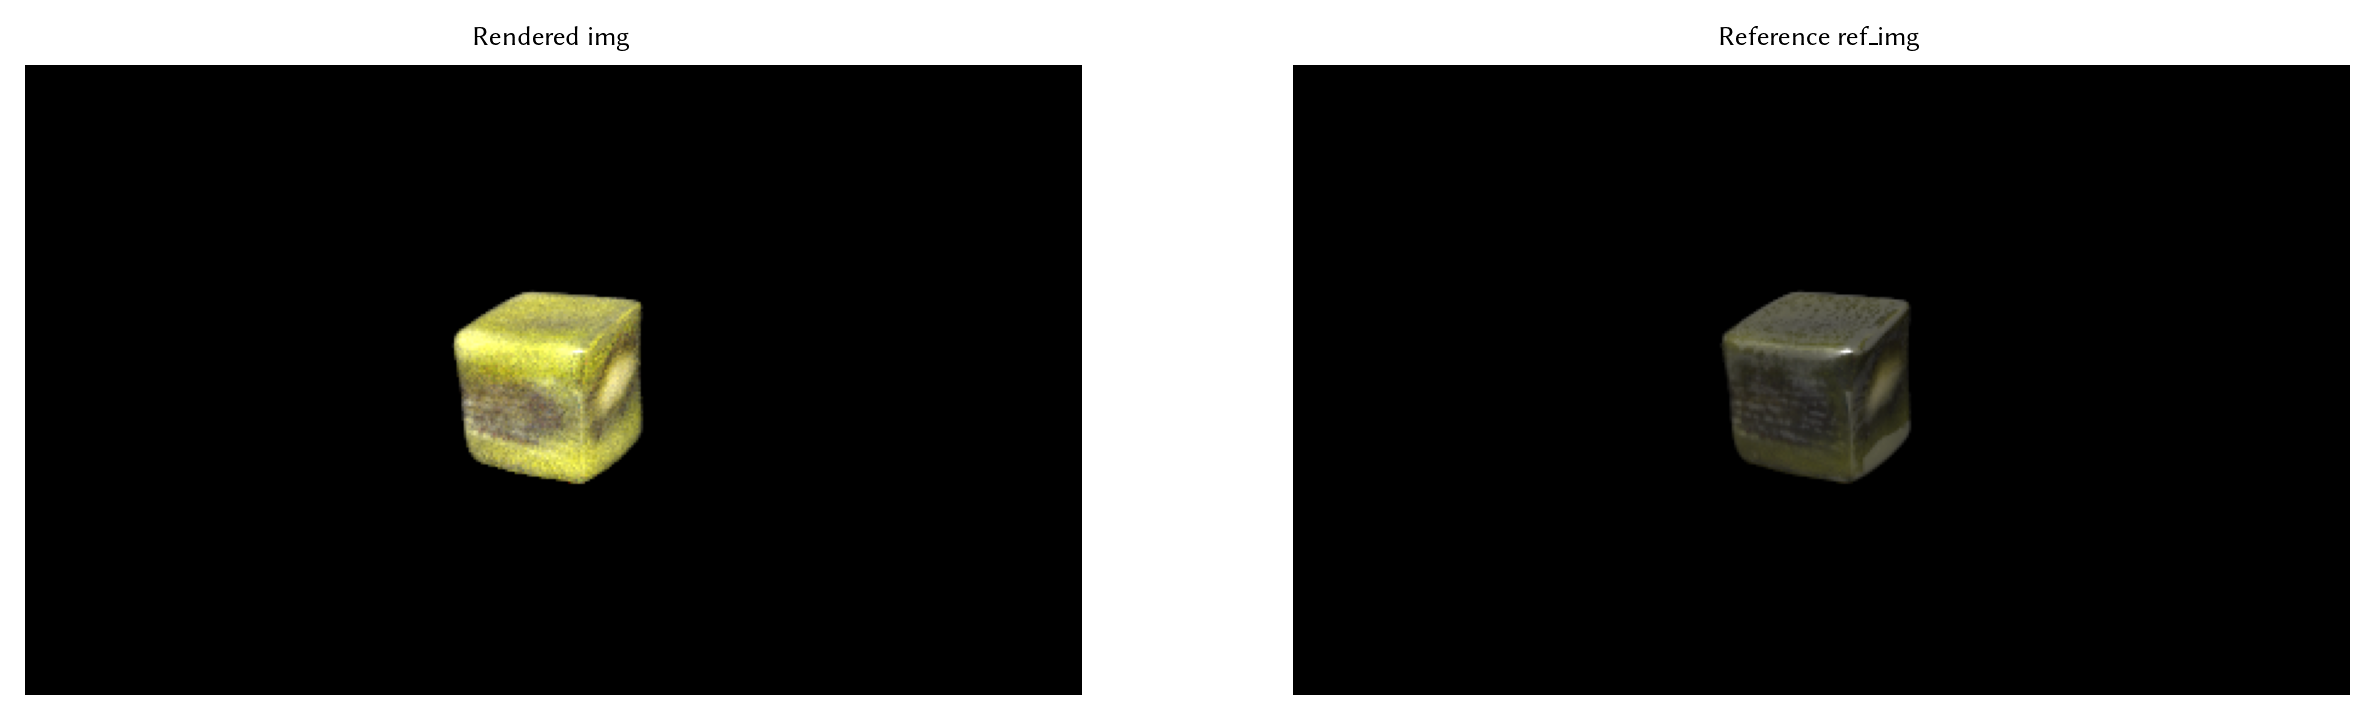

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[4.24115, -3.14376, 0.355149, -24.5604],
                  [-0, 6.45915, 0.254116, -11.7881],
                  [-6.18568, -2.15549, 0.243504, -17.5453],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[8.4823, 0, -12.3714]],
        t=[[-6.28751, 12.9183, -4.31098]],
        n=[[0.710298, 0.508232, 0.487009]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100,

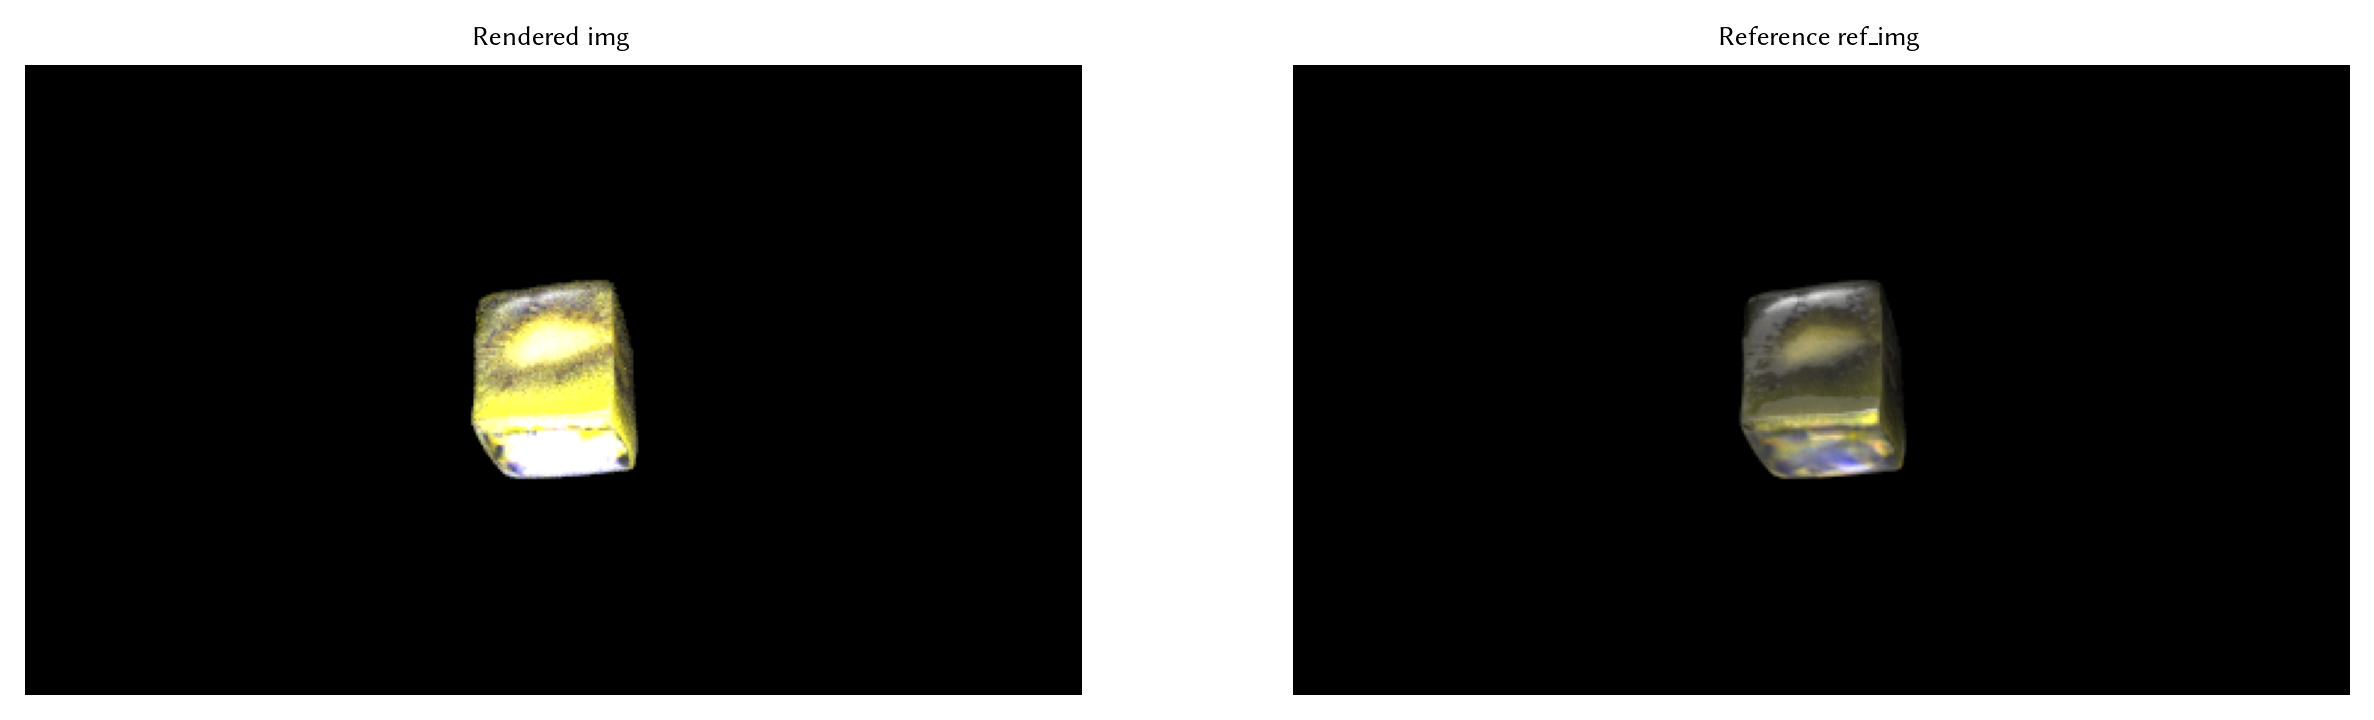

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[2.71416, 5.18368, -0.312785, 22.195],
                  [1e-06, 5.0329, 0.370705, -19.9493],
                  [6.99166, -2.0123, 0.121423, -8.9996],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[5.42831, 2e-06, 13.9833]],
        t=[[10.3674, 10.0658, -4.0246]],
        n=[[-0.62557, 0.741409, 0.242846]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 

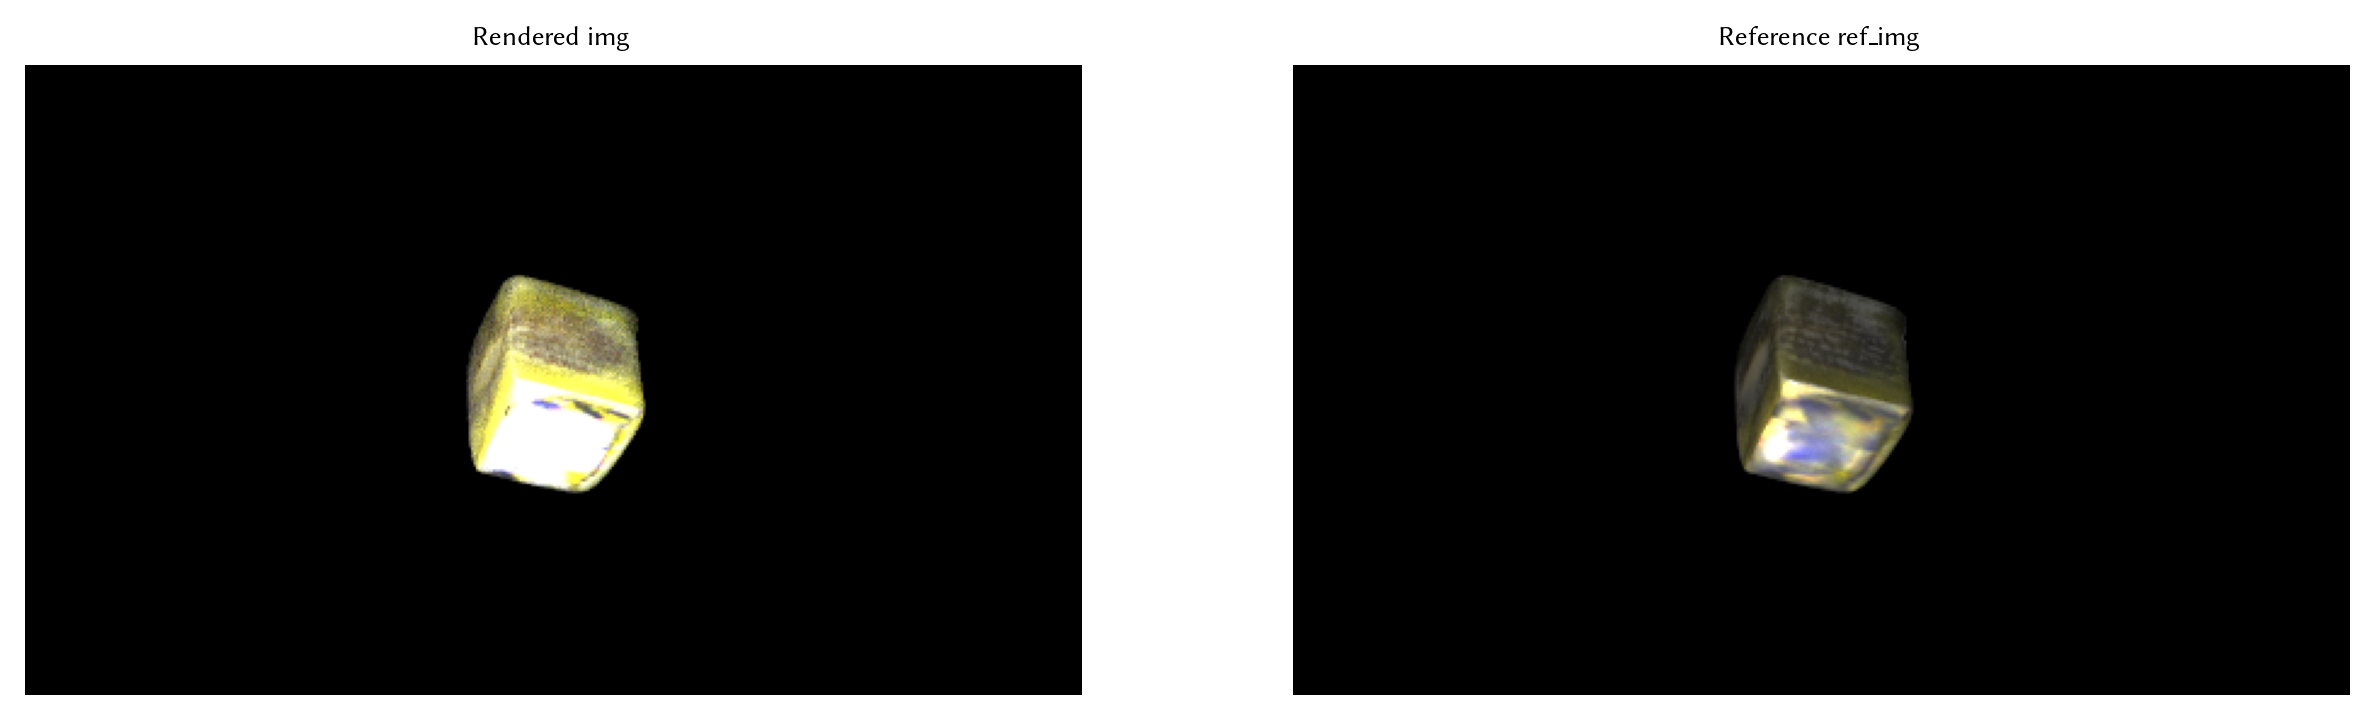

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.31645, 0.928876, 0.090842, -6.05894],
                  [-0, 6.19711, -0.281629, 25.714],
                  [-1.64911, 4.12105, 0.40303, -28.7121],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.6329, 0, -3.29823]],
        t=[[1.85775, 12.3942, 8.2421]],
        n=[[0.181684, -0.563258, 0.806059]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100, 100

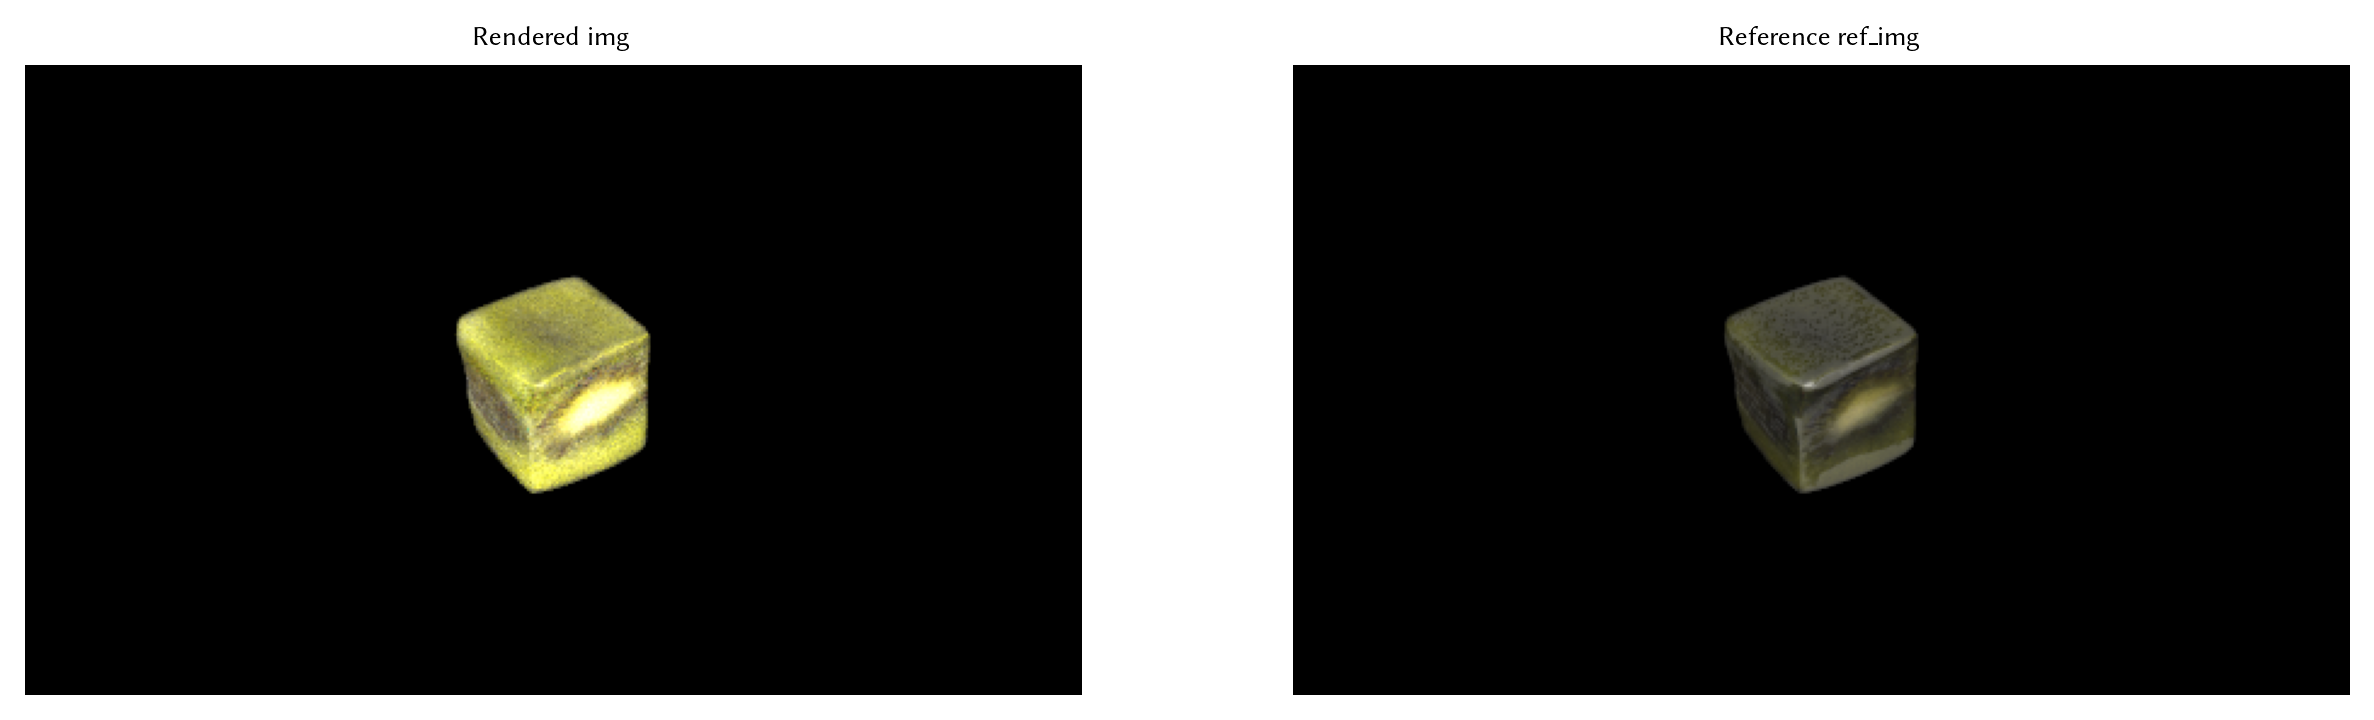

Rendering at resolution level 0 (width=436):   0%|          | 2/1024 [00:05<42:38,  2.50s/it]

Scene[
  children = [
    HDRFilm[
      size = [436, 260],
      crop_size = [436, 260],
      crop_offset = [0, 0],
      sample_border = 0,
      compensate = 0,
      filter = BoxFilter[],
      file_format = OpenEXR,
      pixel_format = rgb,
      component_format = float32,
    ],
    IndependentSampler[
      base_seed = 0
      sample_count = 4
      samples_per_wavefront = 1
      wavefront_size = 0
    ],
    Rectangle[
      to_world = [[7.49468, 0.133494, -0.016586, 1.46101],
                  [0, 6.60873, 0.236406, -10.5484],
                  [0.282341, -3.54357, 0.44027, -31.3189],
                  [0, 0, 0, 1]],
      frame = Frame[
        s=[[14.9894, 0, 0.564682]],
        t=[[0.266988, 13.2175, -7.08714]],
        n=[[-0.0331718, 0.472811, 0.880539]]
      ],
      surface_area = [225],
      bsdf = SmoothDiffuse[
        reflectance = UniformSpectrum[value=[0]]
      ],
      emitter = AreaLight[
        radiance = SRGBReflectanceSpectrum[
          value = [[100

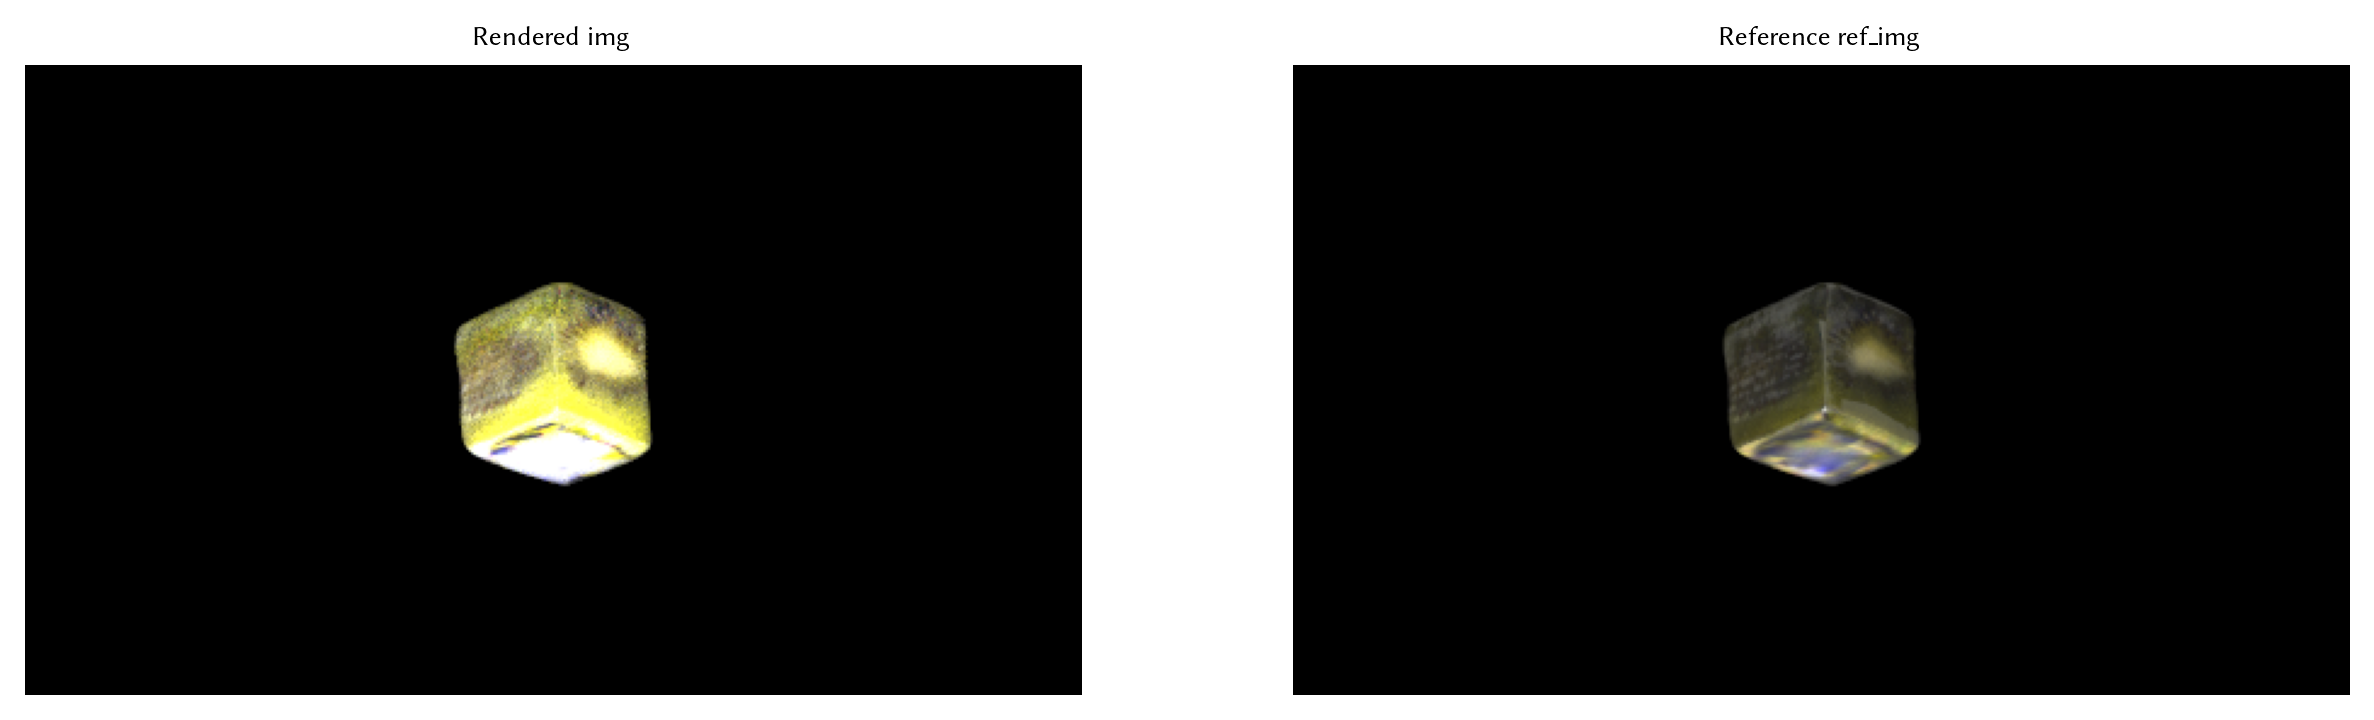

In [ ]:
if technique == 'gradient_filtering':
    gin_config_name = f'{scene_name}/naive'
else:
    gin_config_name = f'{scene_name}/{technique}'

print(f'Next result location: {result_folder}')

optimization_cli.run_config(gin_config_name, override_bindings, sss_config=True)

In [ ]:
# Figure setup

def figure_grid_setup(
    fig_width,
    image_shape,
    image_crop_shape,
    inner_hspace=0.0,
    inner_wspace=0.0,
    outer_space=0.1,
):
  # Image aspect ratios
  h, w = image_shape
  h_crop, w_crop = image_crop_shape
  r = w / h
  r_crop = w_crop / h_crop

  # Spacing in the inner gridspec
  inner_wspace = inner_hspace
  # same vertical spacing as horizontal spacing
  inner_hspace = inner_wspace
  inner_rows = 2
  inner_cols = 3
  inner_height_ratios = [h_crop, h_crop]
  inner_width_ratios = [w_crop, w_crop, w_crop]
  inner_aspect = figutils.gridspec_aspect(
      n_rows=inner_rows,
      n_cols=inner_cols,
      w=inner_width_ratios,
      h=inner_height_ratios,
      wspace=inner_wspace,
      hspace=inner_hspace,
  )
  # Spacing in the main griddpec
  outer_rows = 2
  outer_cols = 1
  outer_wspace = 0
  outer_hspace = outer_space
  # If width is 1, we need the sum of the inverses for the height (single column)
  # If height is 1, we need the sum for the width (single row)
  outer_aspect = figutils.gridspec_aspect(
      n_rows=outer_rows,
      n_cols=outer_cols,
      w=[1],
      h=[1 / inner_aspect, 1 / r],
      wspace=outer_wspace,
      hspace=outer_hspace,
  )
  outer_aspect *= 0.98

  fig = plt.figure(1, figsize=(fig_width, fig_width / outer_aspect))

  outer_gs = fig.add_gridspec(
      outer_rows,
      outer_cols,
      hspace=outer_hspace,
      wspace=outer_wspace,
      height_ratios=[1 / inner_aspect, 1 / r],
      width_ratios=[1],
  )

  inner_gs = gridspec.GridSpecFromSubplotSpec(
      inner_rows,
      inner_cols,
      subplot_spec=outer_gs[0],
      wspace=inner_wspace,
      hspace=inner_hspace,
      width_ratios=inner_width_ratios,
      height_ratios=inner_height_ratios,
  )
  return (
      fig,
      outer_gs,
      inner_gs,
      inner_rows,
      inner_cols,
  )

In [ ]:
FIGURE_DIR = "figures/pdfs"
FIGURE_NAME = "volume_gradients"

ref_crop_offset = (26, 22)
ref_crop_size = (739, 432)

grad_crop_offset = (18, 13)
grad_crop_size = (363, 215)

cropped_ref_image = figutils.crop_image(ref_image,ref_crop_offset,ref_crop_size)
cropped_forward_images = [figutils.crop_image(im,grad_crop_offset,grad_crop_size) for im in forward_images]
cropped_fd_images = [figutils.crop_image(im,grad_crop_offset,grad_crop_size) for im in fd_images]

titles = [
    "Albedo",
    "Extinction",
    "Phase function (HG)",
    r"\textsc{Dragon}",
]
row_titles = ["Our forward", "Finite diff."]

params_label = [
    r"$\rho=[0.2, 0.4, 0.95]$",
    r"$\sigma_t=[15,7,5]$",
    r"$g=[-0.5, -0.2, 0.1]$",
]

(
    fig,
    outer_gs,
    inner_gs,
    inner_rows,
    inner_cols,
) = figure_grid_setup(
    figutils.COLUMN_WIDTH,
    ref_image.shape[:2],
    cropped_forward_images[0].shape[:2],
    inner_hspace=0.02,
    inner_wspace=0.02,
    outer_space=0.0,
)

title_pad = 3
label_pad = 2
line_width = 0.75

strengths = [4.5, 4.5, 4.5]
# Grads
if True:
  for row in range(inner_rows):
    for col in range(inner_cols):
      ax = fig.add_subplot(inner_gs[row, col])
      figutils.disable_ticks(ax)
      if col == 0:
        ax.set_ylabel(row_titles[row], labelpad=label_pad)
      # Our
      if row == 0:
        ax.set_title(titles[col], pad=title_pad)
        im = ax.imshow(
            cropped_forward_images[col],
            cmap=cm.coolwarm,
            vmin=-forward_vlims[col] * strengths[col],
            vmax=forward_vlims[col] * strengths[col],
        )
      elif row == 1:
        im = ax.imshow(
            cropped_fd_images[col],
            cmap=cm.coolwarm,
            vmin=-forward_vlims[col] * strengths[col],
            vmax=forward_vlims[col] * strengths[col],
        )

# Reference
if True:
  ax = fig.add_subplot(outer_gs[1])
  im = ax.imshow(cropped_ref_image)
  ax.set_ylabel(titles[-1], labelpad=label_pad)
  # ax.set_title(r"\vspace{250px}" + r"\;\;\;\;\;\;\;\;\;".join(params_label),pad=0)
  ax.set_xlabel(r"\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;".join(params_label),labelpad=label_pad)
  figutils.disable_ticks(ax)

  ax = fig.add_subplot(outer_gs[0])
  ax.axis('off')
  # Create an inset axes
  inset = inset_axes(
      ax,  # Parent axes
      width="1%",  # Width of the inset in percentage of the parent axis
      height="99.19%",  # Height of the inset in percentage of the parent axis
      loc="lower left",  # Location inside the parent axis
      bbox_to_anchor=(1.005, 0.005, 1, 1),  # Bounding box adjustment
      bbox_transform=ax.transAxes,  # Use axes coordinates
      borderpad=0,
  )  # Padding

  # Create the colorbar
  cbar = fig.colorbar(
      cm.ScalarMappable(
          norm=Normalize(
              vmin=-np.max(forward_vlims), vmax=np.max(forward_vlims)
          ),
          cmap=cm.coolwarm,
      ),
      cax=inset,
      orientation="vertical",
  )
  cbar.ax.yaxis.set_label_position("left")  # Move label to the left
  # cbar.ax.yaxis.tick_left()  # Move ticks to the left side
  cbar.set_label("Parameter gradient", labelpad=-9)
  ticks = [cbar.vmin, cbar.vmax]
  cbar.set_ticks(ticks)
  # cbar.set_ticklabels([f"{x:.2f}" for x in ticks])
  cbar.set_ticklabels(["neg", "pos"])
  cbar.ax.tick_params(pad=1.8, length=0)

# fig.tight_layout()
figutils.force_post_crop_size(fig, figutils.COLUMN_WIDTH)

In [ ]:
figutils.savefig(
    fig,
    name=Path(FIGURE_NAME),
    fig_directory=Path(FIGURE_DIR),
    dpi=300,
    pad_inches=0.005,
    bbox_inches="tight",
    compress=False,
    target_width=figutils.COLUMN_WIDTH,
    backend=None,
)